# Notebook Dedicated to Compare the Reconstructed Energy with the Callibrated energy for multiple radial positions using real Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.lines import Line2D
import seaborn as sn
import glob

# Load the Data

In [5]:
obs_list_data = ['energy', 'posr_av', 'energy_corrected']

In [7]:
# ------- Directory of data -------
#data_type = ['analysis15', 'analysis15_bMR', 'analysis20_bMR']
#main_dir = 'E:/Data/solars/solarnu_Realdata/bisMSB/first_candidates/analysis*/resume_files/'
#main_dir = '/content/drive/MyDrive/SNO+ Analysis/data/solar_data/real_data/bis_MSB/Analysis*/resume_files/'
main_dir = '/home/joankl/data/solars/real_data/bisMSB/first_candidates/analysis*/resume_files/'

# ------- Observable Dictionary -------
obs_dict_data = {obs: np.array([]) for obs in obs_list_data}

# Loop over the observable list to load the data in obs_dict

for obs in obs_list_data:
    obs_dir_list = glob.glob(main_dir + obs + '.npy') # List of directories where the obs is

    # Now loop over the list of directories
    for fdir in obs_dir_list:
        obs_i = np.load(fdir)

        #Save the loaded numpy array in the corresponding key observable in the observable dictioary
        obs_dict_data[obs] = np.append(obs_dict_data[obs], obs_i)

energy = obs_dict_data['energy']
energy_corr = obs_dict_data['energy_corrected']
posr = obs_dict_data['posr_av']
#posr_av = obs_dict['posr_av']
#posx = obs_dict['posx']
#posy = obs_dict['posy']
#posz = obs_dict['posz_av']

# Plots for Various Radial Cuts

In [62]:
r_cut = [5500, 5000, 4500, 3500]  # Radial cut list to test
r_cut_colors = ['#0313fc', '#b204b8', '#2eb804', '#ff0000']

## Raw Spectrum

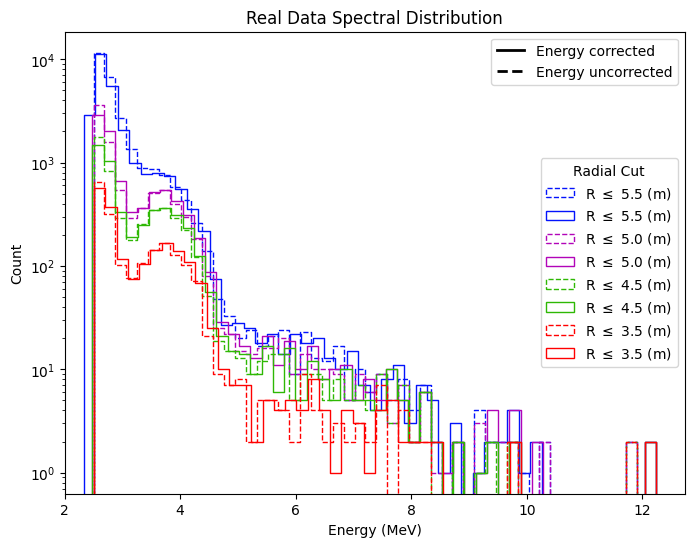

In [63]:
# ====== Plot Settings ======

plt.figure(figsize = (8, 6))

font_style_title = {'family':'serif', 'weight': 'normal','color':'black','size':13}
font_style_axis= {'family':'serif', 'weight': 'normal','color':'black','size':12}
font_prop = font_manager.FontProperties(family=font_style_axis['family'], weight=font_style_axis['weight'], size=font_style_axis['size'])

bins = 50

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply cuts on the dataset ====

    # ---- Construct the masks ----
    posr_mask = (posr <= r_cut_i)
    
    # ---- Select the Data ----
    energy_cut = energy[posr_mask]
    energy_corr_cut = energy_corr[posr_mask]

    # ======== PLOT ========
    
    sn.histplot(energy_cut, bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                linestyle = "--", label = rf'R $\leq$ {r_cut_i*10**(-3)} (m)')   
    sn.histplot(energy_corr_cut, bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step',
                label = rf'R $\leq$ {r_cut_i*10**(-3)} (m)')

# Legend of line-style meaning
style_legend = [Line2D([0], [0], color='black', lw=2, linestyle='-',
                       label='Energy corrected'),
                Line2D([0], [0], color='black', lw=2, linestyle='--',
                       label='Energy uncorrected')]

leg1 = plt.legend(handles=style_legend, loc='upper right')
plt.gca().add_artist(leg1)

#  Legend for r_cut
plt.legend(loc='center right', title='Radial Cut')

plt.xlabel('Energy (MeV)')
plt.title('Real Data Spectral Distribution')

plt.yscale('log')

plt.xlim(2, )


plt.show()

## Residuals Between Uncorrected and Corrected Energy

ValueError: zero-size array to reduction operation minimum which has no identity

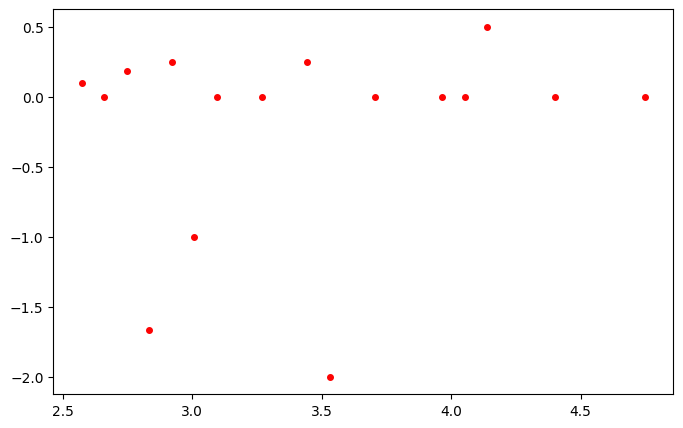

In [61]:
bins = 50

plt.figure(figsize=(8,5))

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply Cuts ====
    posr_mask = (posr <= r_cut_i) 

    # ---- Select the Data ----
    energy_cut= energy[posr_mask]
    energy_corr_cut = energy_corr[posr_mask]

    # ==== Histogram Construction ====
    # Select common energy ranges for histogram construction
    en_min = max([energy_cut.min(), energy_corr_cut.min()])
    en_max = min([energy_cut.max(), energy_corr_cut.max()])

    energy_bin_edges = np.linspace(en_min, en_max, bins + 1)
    energy_bin_center = (energy_bin_edges[:-1] + energy_bin_edges[1:])/2

    counts, _ = np.histogram(energy_cut, bins = energy_bin_edges)
    counts_corr, _ = np.histogram(energy_corr_cut, bins = energy_bin_edges)

    # Remove Zero Counts
    zero_mask = (counts > 0) & (counts_corr > 0)
    counts = counts[zero_mask]
    counts_corr = counts_corr[zero_mask]
    energy_bin_center = energy_bin_center[zero_mask]

    # ==== Residual Computation ====
    residual = (counts - counts_corr) / counts
    
    c1_err = np.sqrt(counts) # Error on counts point 
    c2_err = np.sqrt(counts_corr) # Error on counts points with corrections on energy

    residual_err = (1/c1_err) * np.sqrt(((counts_corr/counts)**2) * c1_err**2 +  c2_err**2)

    plt.errorbar(energy_bin_center, residual, fmt = '.',
                 color = r_cut_colors[i_dx], label = rf'R $\leq$ {r_cut_i*10**-3} (m)',
                 elinewidth = 0.8, capsize = 2, markersize = 8)

plt.plot([0, 14], [0, 0], '--', color = 'gray')
plt.plot([5, 5], [-10, 10], '--', color = 'gray')

plt.legend(loc='lower left')

plt.xlim(2, 12)
plt.ylim(-3, 2)

plt.xlabel('Energy (Mev)')
plt.ylabel('Residual')
plt.title('Residual Between Corrected and Uncorrected Energy Distributions' + '\n' + r'$\text{residual} = \frac{\text{counts - count_corr}}{\text{counts}}$')

plt.grid()
plt.show()
    